In [ ]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import random

In [ ]:
# Reset the pseudo random number generator to the same value.
seed = 1234
np.random.seed(seed)
random.seed(seed)

### Definição de funções úteis.

In [ ]:
def calculateErrorSurface(y, x1, x2):
    '''Generate data points for plotting the error surface.'''
    # Generate values for parameters.
    M = 200
    a1 = np.linspace(-12.0, 14.0, M)
    a2 = np.linspace(-12.0, 14.0, M)

    A1, A2 = np.meshgrid(a1, a2)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((M,M))
    for iter1 in range(0, M):
        for iter2 in range(0, M):
            yhat = A1[iter1, iter2]*x1 + A2[iter1, iter2]*x2
            J[iter1, iter2] = (1.0/N)*np.sum(np.square(y - yhat))

    return J, A1, A2

def gradientStochasticDescent(X, y_noisy, n_epochs, N):
    '''Stochastic gradient descent implementation.'''

    # Deterministic initialization of parameters.
    a = np.array([-10.0, -10.0]).reshape(2, 1)

    # Create vector for parameter history.
    a_hist = np.zeros((2, n_epochs*N+1))
    # Initialize history vector.
    a_hist[:, 0] = a.reshape(2,)

    # Create array for storing error values.
    Jgd = np.zeros(n_epochs*N+1)

    Jgd[0] = (1.0/N)*sum(np.power(y_noisy - X.dot(a), 2))

    # Stocastic gradient-descent loop.
    grad_hist = np.zeros((2, n_epochs*N))
    for epoch in range(n_epochs):

        # Shuffle the whole dataset before every epoch.
        shuffled_indexes = random.sample(range(0, N), N)

        # Iteration counter.
        for i in range(N):
            # Randomly selecting one training example.
            random_index = shuffled_indexes[i]
            xi = X[random_index:random_index+1]
            yi = y_noisy[random_index:random_index+1]

            # Weights' update.
            gradients = -2.0*xi.T.dot(yi - xi.dot(a))
            a = a - alpha * gradients

            # Calculate per iteration error.
            Jgd[epoch*N+i+1] = (1.0/N)*sum(np.power((y_noisy - X.dot(a)), 2))

            # Store history.
            grad_hist[:, epoch*N+i] = gradients.reshape(2,)
            a_hist[:, epoch*N+i+1] = a.reshape(2,)

    return a, Jgd, a_hist, grad_hist

**Observações**:

+ **Época**: corresponde a utilização de todo o conjunto de exemplos no treinamento do modelo, ou seja, é quando todo o conjunto (exemplos) de treinamento é apresentado ao modelo (i.e., algoritmo de aprendizado de máquina).

+ **Iteração**: corresponde a um sub-conjunto de exemplos de treinamento apresentados ao modelo. A iteração conta o número de sub-conjuntos necessários para se completar uma época (caso cada sub-conjunto seja menor do que o conjunto de total de exemplos de treinamento).

+ Por exemplo, com o gradiente descendente em batelada, uma iteração é igual a uma época, pois apresenta-se ao modelo todos os dados de uma única vez. Porém, com o GDE, uma época é igual a $N$ iterações.

### Gerando a função observável.

In [ ]:
# Define the number of examples.
N = 1000

# Generate target function.
x1 = np.random.randn(N, 1)
x2 = np.random.randn(N, 1)

# True function.
y = x1 + x2

# Noise.
w = np.random.randn(N, 1)

# Noisy (observable) function.
y_noisy = y + w

### Plotando a função observável.

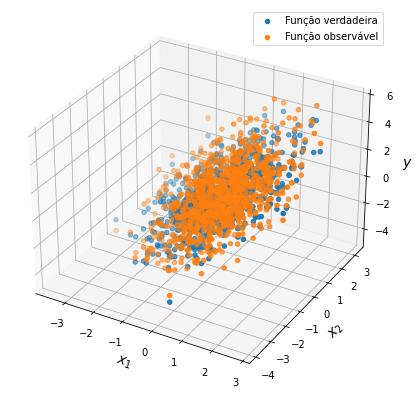

In [ ]:
# Plot observable function.
fig = plt.figure(figsize=(7,7))
plt.subplot(projection='3d')
ax = fig.gca()
ax.scatter(x1,x2,y, label='Função verdadeira')
ax.scatter(x1,x2,y_noisy, label='Função observável')
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_zlabel('$y$', fontsize=14)
plt.legend()
plt.show()

### Encontrando a solução ótima com a equação normal.

In [ ]:
# Concatenate both column vectors, x1 and x2.
X = np.c_[x1, x2]

# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))

# Print a1 and a2 weights.
print('peso a1:', a_opt[0, 0])
print('peso a2:', a_opt[1, 0])

# Preform prediction.
yhat = X.dot(a_opt)

# Calculate the mean squared error.
Joptimum = (1.0/N)*np.sum(np.power((y_noisy - yhat), 2))

# Plot the MSE.
print('Erro:', Joptimum)

peso a1: 1.0373518580863197
peso a2: 1.0549021717423768
Erro: 0.9809577522249409


### Plotando a superfície de erro.

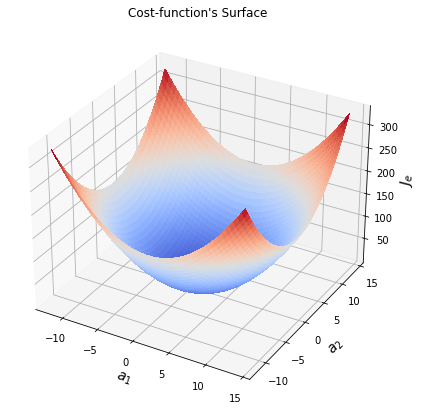

In [ ]:
J, A1, A2 = calculateErrorSurface(y_noisy, x1, x2)

# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
plt.subplot(projection='3d')
ax = fig.gca()
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')
#plt.savefig("error_surface_sgd.png", dpi=600)
#Show the plot.
plt.show()

### Encontrando os pesos com o gradiente descendente estocástico.

In [ ]:
# Number of epochs.
n_epochs = 1

# Constant learning rate.
alpha = 0.1

# Call function that implements the mini-batch.
a, Jgd, a_hist, grad_hist = gradientStochasticDescent(X, y_noisy, n_epochs, N)

### Plotando a superfície de contorno.

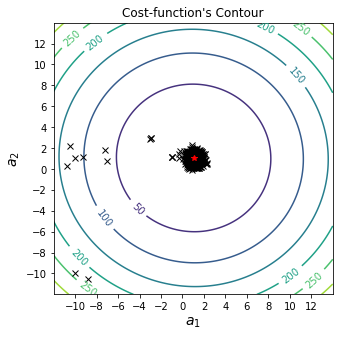

In [ ]:
# Plot figure.
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_hist[0, :], a_hist[1, :], 'kx')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.xticks(np.arange(-10, 14, step=2.0))
plt.yticks(np.arange(-10, 14, step=2.0))
#plt.savefig("error_contour_sgd.png", dpi=600)
plt.show()

#### Observação

+ Por **aproximar** o vetor gradiente com apenas **uma amostra**, as derivadas parciais serão **“ruidosas”** ou seja, aleatórias.

+ Portanto, **não apresenta um caminho regular** em direção ao mínimo, mudando de direção várias vezes.

+ Devido às atualizações serem ruidosas, o algoritmo não converge e se estabiliza no mínimo: **“oscila”** em torno dele.

### Comparando os valores dos pesos.

In [ ]:
# Print found values.
print('Pesos encontrados com a equação normal:')
print('a1_opt: ' + str(a_opt[0, 0]))
print('a2_opt: ' + str(a_opt[1, 0]))
print('')

print('Pesos encontrados com o GDE:')
print('a1_sgd: ' + str(a[0, 0]))
print('a2_sgd: ' + str(a[1, 0]))

Pesos encontrados com a equação normal:
a1_opt: 1.0373518580863197
a2_opt: 1.0549021717423768

Pesos encontrados com o GDE:
a1_sgd: 0.7625896450779295
a2_sgd: 0.22691030647855553


#### Observação

+ Ao final do treinamento, devido às oscilações, os valores finais dos pesos podem ficar muito distantes dos valores ótimos.
    + Ou seja, os valores finais dos pesos podem estar distantes dos valores ótimos (encontrados com a equação normal).

### Plotando o MSE em função das iterações.

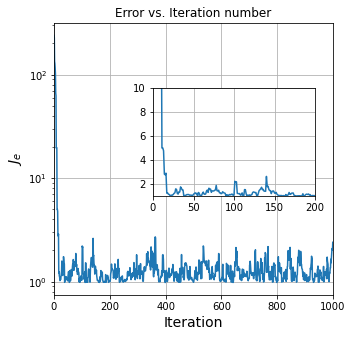

In [ ]:
fig = plt.figure(figsize=(5,5))

plt.plot(np.arange(0, n_epochs*N), Jgd[0:n_epochs*N])
plt.xlim((0, n_epochs*N))
plt.yscale('log')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('$J_e$', fontsize=14)
plt.title('Error vs. Iteration number')
plt.grid()

left, bottom, width, height = [0.4, 0.4, 0.45, 0.3]
ax1 = fig.add_axes([left, bottom, width, height])
ax1.plot(np.arange(0, n_epochs*N), Jgd[0:n_epochs*N])
ax1.set_xlim(0, 200)
ax1.set_ylim(1, 10)
ax1.grid()

#plt.savefig("error_vs_iteration_sgd.png", dpi=600)
plt.show()

#### Observação

+ Tempo de treinamento é menor quando comparado com o batelada: em menos de 50 iterações (ou seja, 50 exemplos) o algoritmo já se aproxima do ponto ótimo.

+ O tempo de treinamento é menor porquê o GDE usa um único exemplo do conjunto de treinamento para aproximar o vetor gradiente, diferentemente do GD em batelada, que utiliza todas os exemplos do conjunto de treinamento.

### Plotando a variação do gradiente ao longo das iterações.

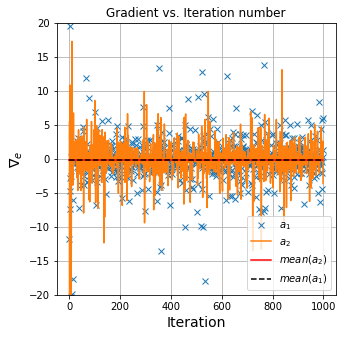

In [ ]:
fig = plt.figure(figsize=(5,5))

plt.plot(np.arange(0, n_epochs*N), grad_hist[0,:], 'x', label='$a_1$')
plt.plot(np.arange(0, n_epochs*N), grad_hist[1,:], label='$a_2$')
plt.plot(np.arange(0, n_epochs*N), np.mean(grad_hist[1,:])*np.ones(n_epochs*N), 'r', label='$mean(a_2)$')
plt.plot(np.arange(0, n_epochs*N), np.mean(grad_hist[0,:])*np.ones(n_epochs*N), 'k--', label='$mean(a_1)$')
plt.ylim([-20, 20])
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('$\\nabla_e$', fontsize=14)
plt.title('Gradient vs. Iteration number')
plt.legend()
plt.grid()
plt.show()

#### Observação

+ A convergência ocorre apenas na média, mas localmennte, os gradientes são ruidosos.

+ Algumas técnicas podem ser usadas para torna-lo mais comportado e talvez convergir: redução do passo, early-stop, momentum, etc.